In [50]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [51]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape = IMAGE_SHAPE +(3,))
])


In [52]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [53]:
url ="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/%E3%83%AF%E3%82%AD%E3%83%B320120701.JPG/375px-%E3%83%AF%E3%82%AD%E3%83%B320120701.JPG"

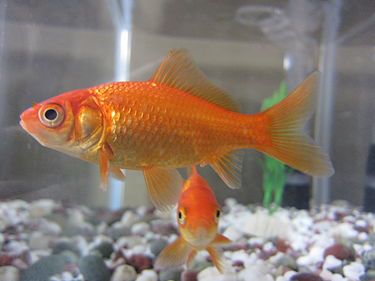

In [75]:
from urllib import request
response = request.urlretrieve(url, "goldfish.jpg")
goldfish = Image.open("/content/goldfish.jpg")
goldfish

In [76]:
goldfish.getdata

<bound method Image.getdata of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x281 at 0x7FF3F2F24210>>

In [78]:
goldfish = goldfish.resize(IMAGE_SHAPE)

In [79]:
goldfish = np.array(goldfish)/255.0
goldfish

array([[[0.45098039, 0.45882353, 0.51764706],
        [0.45882353, 0.46666667, 0.51764706],
        [0.4627451 , 0.47058824, 0.52156863],
        ...,
        [0.29411765, 0.28627451, 0.30588235],
        [0.30980392, 0.30196078, 0.32156863],
        [0.30980392, 0.30196078, 0.32156863]],

       [[0.44705882, 0.45490196, 0.51372549],
        [0.4745098 , 0.48235294, 0.5372549 ],
        [0.47058824, 0.47843137, 0.52941176],
        ...,
        [0.30588235, 0.30196078, 0.32156863],
        [0.32156863, 0.31372549, 0.33333333],
        [0.31764706, 0.30980392, 0.33333333]],

       [[0.46666667, 0.4745098 , 0.53333333],
        [0.48627451, 0.49411765, 0.54901961],
        [0.47843137, 0.48627451, 0.5372549 ],
        ...,
        [0.31372549, 0.29803922, 0.31764706],
        [0.3254902 , 0.30980392, 0.32941176],
        [0.31372549, 0.30196078, 0.31764706]],

       ...,

       [[0.55686275, 0.55294118, 0.54901961],
        [0.56862745, 0.56862745, 0.56470588],
        [0.58823529, 0

In [80]:
goldfish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [81]:
result = classifier.predict(goldfish[np.newaxis, ...])

1/1 [==============================] - 1s 511ms/step


In [82]:
predicted_index = np.argmax(result)
predicted_index

2

In [83]:
fileurl = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
response = request.urlretrieve(fileurl, "label.txt")
labels = []
with open("label.txt","r") as f:
  labels = f.read().splitlines()

labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [84]:
labels[predicted_index]

'goldfish'

In [85]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir= ".", untar=True)

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [86]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [87]:
str(flowers_images_dict["roses"][0])

'datasets/flower_photos/roses/483444865_65962cea07_m.jpg'

In [88]:
img = cv2.imread(str(flowers_images_dict["roses"][0]))
img.shape

(240, 180, 3)

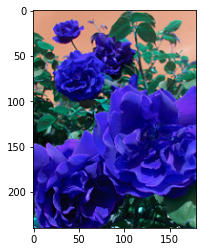

In [95]:
plt.imshow(img)

In [97]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [98]:
x, y = [], []
for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,IMAGE_SHAPE)
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

roses
daisy
dandelion
sunflowers
tulips


In [99]:
x = np.array(x)
y = np.array(y)

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [101]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

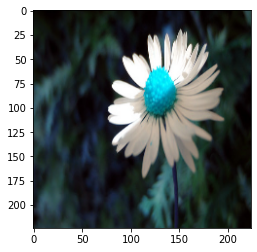

In [108]:
plt.imshow(x[1000])

In [112]:
predicted = classifier.predict(np.array([x[0],x[1],x[2]]))

1/1 [==============================] - 0s 257ms/step


In [113]:
predicted = np.argmax(predicted,axis =1)
predicted

array([444, 795, 795])

'shower curtain'

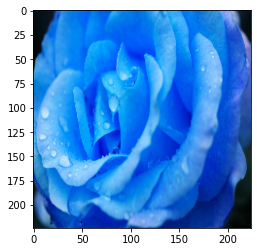

In [118]:
plt.imshow(x[2])
labels[795]